# Data Analysis

In this section we will have a look at the difference in products between hedonic and utilitarian dirven products. We will see if we can find any patterns in the data from a descriptive level and then move on to a more inferential level.

## Packages and Importing Data

In [5]:
# Installing packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk import bigrams
from wordcloud import WordCloud


In [6]:
# importing data
data_utilitarian_filter = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Features_utilitarian_filter.csv')

data_utilitarian_razor = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Features_utilitarian_razor.csv')

data_utilitarian_mouse = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Features_utilitarian_mouse.csv')

data_hedonic = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Features_hedonic_total.csv')

In [7]:
data_frames = [data_utilitarian_razor, data_utilitarian_filter, data_utilitarian_mouse,data_hedonic]

# Iterate over each DataFrame
for df in data_frames:
    # Check if 'timestamp' column exists in the DataFrame
    if 'timestamp' in df.columns:
        # Convert 'timestamp' column to datetime format
        df['timestamp'] = pd.to_datetime(df['timestamp'])

# Functions for data analysis

In [8]:
def plot_reviews_by_year(df, title_suffix=None):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    df['year'].hist(bins=len(df['year'].unique()), color='blue', alpha=0.5)
    if title_suffix:
        plt.title(f'Distribution of Reviews by Year - {title_suffix}')
    else:
        plt.title('Distribution of Reviews by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Reviews')
    plt.grid(True)
    plt.show()

In [9]:

def plot_avg_rating_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Group by year and calculate the average rating
    avg_rating_by_year = df.groupby('year')['rating'].mean()

    # Plot the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, color='blue', marker='o', linestyle='-')
    plt.title('Average Rating of Reviews by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.grid(True)
    plt.show()

# Example usage:
# plot_avg_rating_by_year(your_dataframe)


In [10]:
# Function for showing the amount on reviews by year

def plot_rating_counts_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Map ratings to categories (1 and 2 as negative, 3 as neutral, 4 and 5 as positive)
    rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
    df['rating_category'] = df['rating'].map(rating_categories)

    # Group by year and rating category, then count the occurrences
    rating_counts_by_year = df.groupby(['year', 'rating_category']).size().unstack(fill_value=0)

    # Plot the stacked bar plot
    plt.figure(figsize=(10, 6))
    rating_counts_by_year.plot(kind='bar', stacked=True, color=['red', 'grey', 'green'], alpha=0.7)
    plt.title('Rating Distribution by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Ratings')
    plt.legend(title='Rating Category', loc='upper left')
    plt.grid(True)
    plt.show()


In [11]:
# Showing sentiment distribution by year

def plot_sentiment_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Plot the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='sentiment', data=df, palette='Set2')
    plt.title('Distribution of Text Sentiment by Year')
    plt.xlabel('Year')
    plt.ylabel('Text Sentiment')
    plt.grid(True)
    plt.show()


In [12]:
def plot_average_rating_and_sentiment_over_time(data_frame):
    # Group the data by timestamp and calculate the average rating for each time period
    average_rating_over_time = data_frame.groupby(pd.Grouper(key='timestamp', freq='M'))['rating'].mean()

    # Group the data by timestamp and calculate the average sentiment score for each time period
    average_sentiment_over_time = data_frame.groupby(pd.Grouper(key='timestamp', freq='M'))['sentiment'].mean()

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting average rating over time
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Average Rating', color=color)
    ax1.plot(average_rating_over_time.index, average_rating_over_time.values, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    # Create a secondary y-axis for sentiment score
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Average Sentiment Score', color=color)
    ax2.plot(average_sentiment_over_time.index, average_sentiment_over_time.values, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Average Rating and Sentiment Over Time')
    plt.show()

# 1. Basic statistic

In [13]:
# Quick overlook of the data
print (data_utilitarian_mouse.describe())


            rating                      timestamp  helpful_vote  \
count  4027.000000                           4027   4027.000000   
mean      3.800099  2021-04-29 19:04:14.940043776      1.058108   
min       1.000000     2018-09-15 03:30:45.715000      0.000000   
25%       2.000000  2020-08-03 23:56:41.974500096      0.000000   
50%       5.000000  2021-04-22 21:26:25.137999872      0.000000   
75%       5.000000  2022-02-25 06:27:49.151000064      0.000000   
max       5.000000     2023-08-30 00:33:14.355000   1725.000000   
std       1.560987                            NaN     29.667986   

       average_rating  rating_number         price    sentiment  \
count    4.027000e+03         4027.0  4.027000e+03  4027.000000   
mean     4.700000e+00        46976.0  4.587000e+01     2.754904   
min      4.700000e+00        46976.0  4.587000e+01     0.000000   
25%      4.700000e+00        46976.0  4.587000e+01     1.000000   
50%      4.700000e+00        46976.0  4.587000e+01     4.0000

In [14]:
print (data_utilitarian_filter.describe())


            rating                      timestamp  helpful_vote    sentiment  \
count  5847.000000                           5847   5847.000000  5847.000000   
mean      4.066188  2020-05-18 22:36:10.798031616      0.824867     2.986318   
min       1.000000            2015-05-31 22:48:04      0.000000     0.000000   
25%       4.000000  2019-02-19 08:37:44.741000192      0.000000     2.000000   
50%       5.000000  2020-08-07 14:25:42.286000128      0.000000     4.000000   
75%       5.000000  2021-11-23 14:06:54.096999936      0.000000     4.000000   
max       5.000000     2023-08-24 16:41:33.536000   1081.000000     4.000000   
std       1.521731                            NaN     18.180278     1.618873   

       average_rating  rating_number         price  helpful_ratio  \
count    5.847000e+03         5847.0  5.847000e+03    5847.000000   
mean     4.700000e+00        90203.0  5.399000e+01       0.000171   
min      4.700000e+00        90203.0  5.399000e+01       0.000000   
25%

In [15]:
print (data_utilitarian_razor.describe())

             rating                      timestamp  helpful_vote  \
count  11317.000000                          11317  11317.000000   
mean       4.001767  2018-01-12 13:03:35.663960064      2.665812   
min        1.000000            2008-11-17 15:54:20      0.000000   
25%        3.000000            2016-01-16 11:43:26      0.000000   
50%        5.000000     2018-02-21 15:37:05.736000      0.000000   
75%        5.000000     2019-12-28 01:31:42.588000      0.000000   
max        5.000000     2023-08-18 14:03:08.916000   9766.000000   
std        1.439727                            NaN    111.703184   

          sentiment  average_rating  rating_number         price  \
count  11317.000000    1.131700e+04        11317.0  1.131700e+04   
mean       3.033048    4.300000e+00        52307.0  4.099000e+01   
min        0.000000    4.300000e+00        52307.0  4.099000e+01   
25%        2.000000    4.300000e+00        52307.0  4.099000e+01   
50%        4.000000    4.300000e+00        5230

<Figure size 1000x600 with 0 Axes>

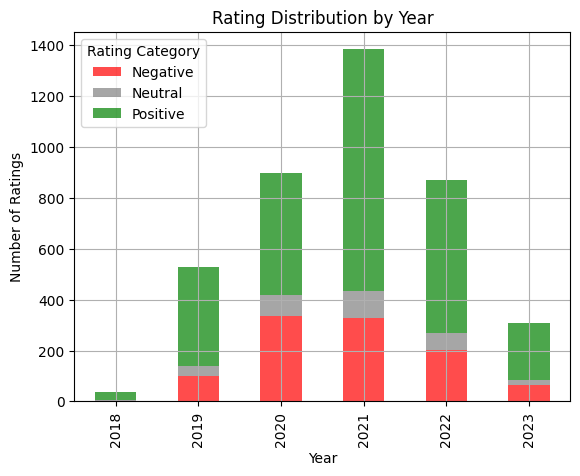

<Figure size 1000x600 with 0 Axes>

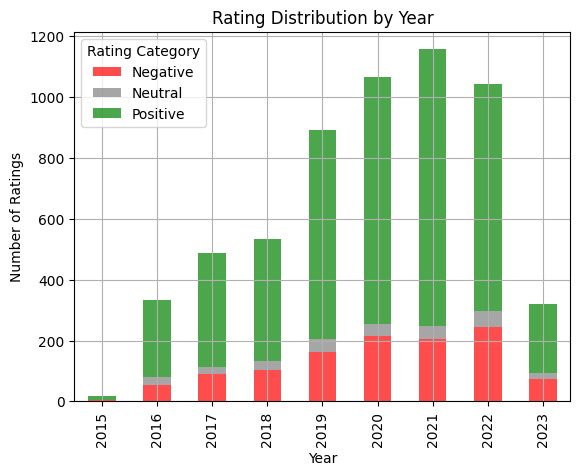

<Figure size 1000x600 with 0 Axes>

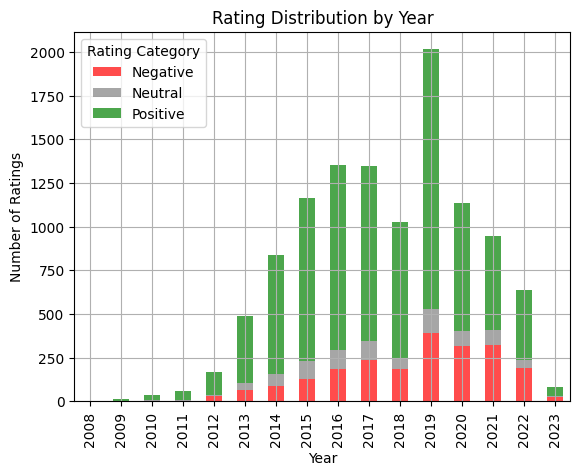

In [23]:
plot_rating_counts_by_year (data_utilitarian_mouse)
plot_rating_counts_by_year (data_utilitarian_filter)
plot_rating_counts_by_year (data_utilitarian_razor)

## Analyzing Helpfulness

In [17]:
# Function for plotting helpfulness distribution

def plot_helpfulness_votes_over_time(data_frame):
    # Group by timestamp and calculate the sum of helpfulness votes
    votes_by_timestamp = data_frame.groupby('timestamp')['helpful_vote'].sum()

    # Filter out timestamps with less than or equal to 1 helpful vote
    votes_by_timestamp = votes_by_timestamp[votes_by_timestamp > 1]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(votes_by_timestamp.index, votes_by_timestamp, color='blue', alpha=0.5)
    plt.title('Helpfulness Votes over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Total Helpful Votes')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [18]:
helpful_reviews_count = data_utilitarian_mouse[data_utilitarian_mouse['helpful_vote'] > 0].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

Number of reviews with at least one helpful rating: 518


In [19]:
helpful_reviews_count = data_utilitarian_filter[data_utilitarian_filter['helpful_vote'] > 0].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

Number of reviews with at least one helpful rating: 706


In [20]:
helpful_reviews_count = data_utilitarian_razor[data_utilitarian_razor['helpful_vote'] > 0].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

Number of reviews with at least one helpful rating: 1664


In [21]:
helpful_reviews_count = data_hedonic[data_hedonic['helpful_vote'] > 0].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

Number of reviews with at least one helpful rating: 5207


## 3. Text Analysis Wordclouds 

In [22]:
# Generating Wordclouds

def generate_wordcloud_reviews_by_sentiment(df):
    # Define rating categories
    rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Iterate over each sentiment category
    for ax, sentiment in zip(axes.flatten(), ['Negative', 'Neutral', 'Positive']):
        # Filter out reviews based on sentiment
        reviews = df[df['rating'].map(rating_categories) == sentiment]
        
        # Drop rows where 'text_cleaned1' column contains NaN values
        reviews.dropna(subset=['text_cleaned1'], inplace=True)
        
        # Concatenate the cleaned text of reviews
        text = ' '.join(reviews['text_cleaned1'])

        # Generate bigrams from the text
        bigram_list = list(bigrams(text.split()))

        # Create a WordCloud object with bigrams
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(dict(bigram_list))

        # Plot the WordCloud
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Word Cloud of {sentiment} Reviews (Bigrams)')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()